# Business Understanding
A fictional house flipping company has hired me to **analyze the King County Housing Market and provide three recommendations based on the trends of the housing market**. I will be providing insights on what features to look for when buying a house and the best remodeling options. This will allow the company to increase profits when it resells the house.

# Objectives
For this project, I will be using a **Multivariate Linear Regression model** to provide my recommendations. The model will help in understanding the relationship between our **features** (number of bedrooms, grade, etc.) on our **dependent variable** (the house price).

# Evaluation
The evaluation of the model will be based on a few metrics.


- Adjusted $R^2$: 


It is a statistical calculation that measures the degree of interrelation and dependence between our independent and dependent variables. The adjusted score takes into account how many features (independent variables) you have in your model. Basically it determines how much of an effect our independent variables have on our dependent variable. 


- P-value: 


The p-value determines if a feature is statistically significant.


We will set our ${α}$ at 0.05. So if our P-value < 0.05 it is considered statistically significant

<br />
<br />

For more information on the evaluation metrics you can visit these links


[Adjusted $R^2$](https://www.datavedas.com/model-evaluation-regression-models/)


[P-value](https://www.investopedia.com/terms/p/p-value.asp)


[Alpha](https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/what-is-an-alpha-level/)

# My recommendations
Here is a quick look at my final recommendations:

Features to consider when buying
- waterfront
- View
- in_bellevue

Features that can be remodeled
- Condition
- Floors
- Bathrooms

The following notebook will show my process and I have more in depth recommendations for these features at the end

# Imports

In [1]:
import pandas as pd # Importing/Organizing Data
import seaborn as sns # vis library
import matplotlib.pyplot as plt # vis library
import numpy as np # Useful mathmatical functions

import statsmodels.api as sm # Linear regression modeling
import scipy.stats as stats # Statistical methods

# Sets the plots to be displayed in the notebook
%matplotlib inline 


from patsy import dmatrices # design matrix

# Used to check for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor 

from sklearn.preprocessing import StandardScaler

# EDA

### Column Names and Descriptions for King County Data Set
* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each condition code
* `grade` - Overall grade of the house. Related to the construction and design of the house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each building grade code
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `zipcode` - ZIP Code used by the United States Postal Service
* `lat` - Latitude coordinate
* `long` - Longitude coordinate
* `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
* `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors

In [2]:
# Brining in and previewing our data
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
# Tells us the number of rows and columns
df.shape

(21597, 21)

In [4]:
# Tells us non null count and Dtype for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
# Has the counts, mean, std, min/max and quartile values of each numeric feature
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


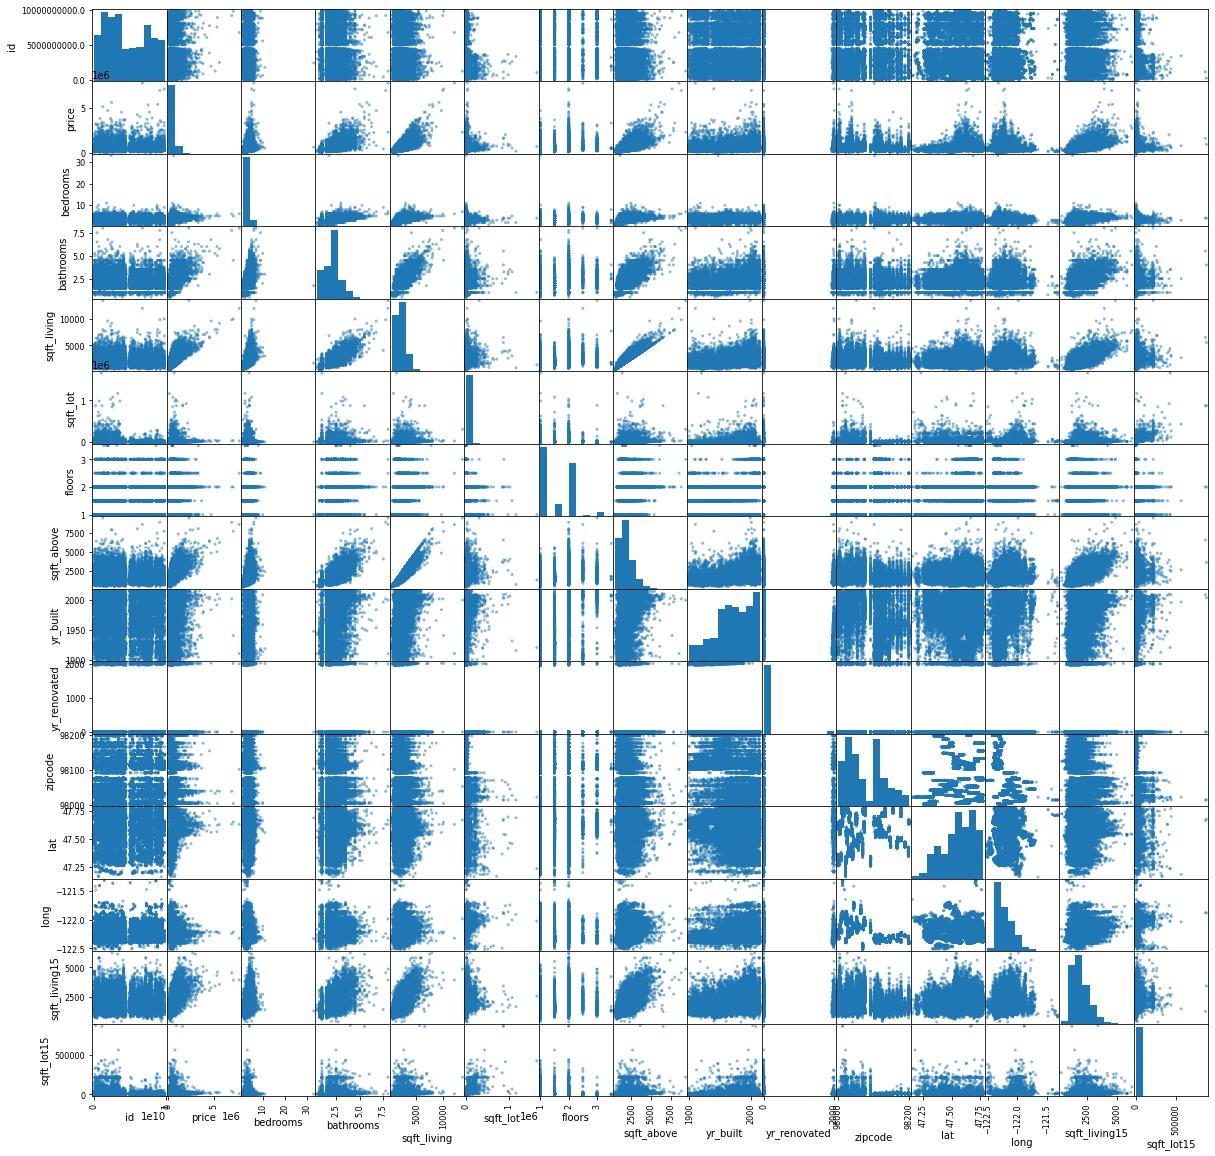

In [6]:
# Scatter matrix
pd.plotting.scatter_matrix(df, figsize=[20, 20]);

This scatter matrix displays all continuous variables on a scatterplot. On a diagonal in the middle it displays hist plots

The main thing we are looking at is the price column to see how each feature is graphed out compared to our price. We will also be looking at the diagonal hists

In [7]:
# Making a copy to clean
df_cleaned = df.copy()

In [8]:
# dropping values I don't want for modeling

# lat, long - Outside scope of my project. In the future I'd like to come back
# and look at things like distance from center of town and distance from a school

# sqft_above, sqft_basement - added together is equal to sqft_living
# I convert sqft_basement into has_basement later and drop it after

df_cleaned.drop(['lat', 'long', 'sqft_above'], axis=1, inplace=True)

In [9]:
# Shows number of nulls
df_cleaned.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [10]:
# Seeing if there is any common placeholder values  for each feature
# Further investigating for feature specific placeholders might be necessary
# Such as unreasonably small/large numbers
df_cleaned.isin(['NaN', 'null', 'N/A', '#', '?']).any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_basement     True
yr_built         False
yr_renovated     False
zipcode          False
sqft_living15    False
sqft_lot15       False
dtype: bool

# Outlier Dropping

We will not be using sqft_lot and sqft_lot15 in our final model since even after doing outlier dropping and putting them into our model below they are not statistically significant

I will not perform outlier dropping here as to deal with problems of loosing too much data overall in my outlier dropping

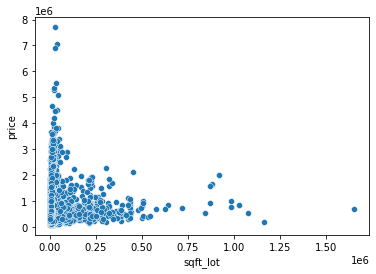

In [11]:
# Before outlier dropping
sns.scatterplot(data=df, x="sqft_lot", y="price");

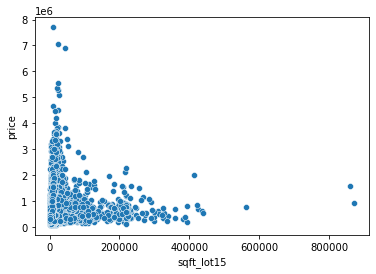

In [12]:
# Before outlier dropping
sns.scatterplot(data=df, x="sqft_lot15", y="price");

In [13]:
# Making test_df to illustrate without affecting my df_cleaned
test_df = df_cleaned.copy() 

# Takes selected features and removes outliers based on quantile range
features = ['sqft_lot', 'sqft_lot15'] # Selected features
to_drop = [] # Initialize an empty list
# Iterates through the features and assigns what should be dropped to list
for feature in features:
    out_threshold_low = df[feature].quantile(0.01)
    out_threshold_hi  = df[feature].quantile(0.99)

    to_drop.extend(df[(df[feature] < out_threshold_low) | (df[feature] > out_threshold_hi)].index)

to_drop = list(set(to_drop)) # Preparing the list
test_df.drop(to_drop, inplace=True) # Dropping the values

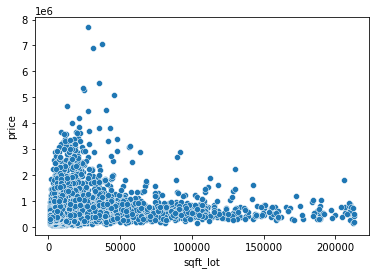

In [14]:
# After outlier dropping
sns.scatterplot(data=test_df, x="sqft_lot", y="price");

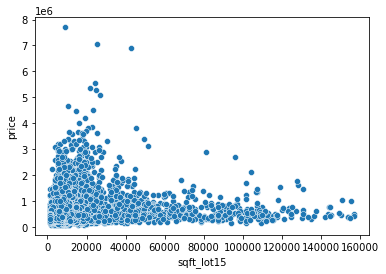

In [15]:
# After outlier dropping
sns.scatterplot(data=test_df, x="sqft_lot15", y="price");

We see that even after outlier dropping there is not a linear relationship so we will not use these features

In [16]:
df_cleaned.drop(['sqft_lot', 'sqft_lot15'], axis=1, inplace=True)

Next we will do outlier dropping for bedrooms and price

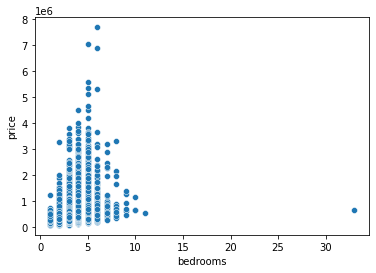

In [17]:
# Before outlier dropping
sns.scatterplot(data=df, x="bedrooms", y="price");

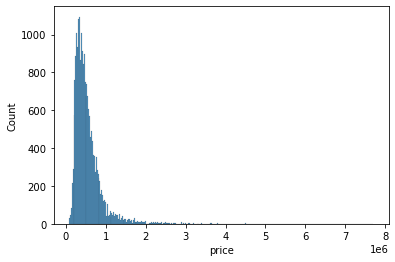

In [18]:
# Before outlier dropping
sns.histplot(data=df, x='price');

In [19]:
# Takes selected features and removes outliers based on quantile range
features = ['bedrooms', 'price'] # Selected features
to_drop = [] # Initialize an empty list
# Iterates through the features and assigns what should be dropped to list
for feature in features:
    out_threshold_low = df[feature].quantile(0.01)
    out_threshold_hi  = df[feature].quantile(0.99)

    to_drop.extend(df[(df[feature] < out_threshold_low) | (df[feature] > out_threshold_hi)].index)

to_drop = list(set(to_drop)) # Preparing the list
df_cleaned.drop(to_drop, inplace=True) # Dropping the values

Since id is a unique identifier any duplicate ids should be dropped as well

In [20]:
df_cleaned.drop_duplicates(subset='id', inplace=True)

In [21]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20788 entries, 0 to 21596
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20788 non-null  int64  
 1   date           20788 non-null  object 
 2   price          20788 non-null  float64
 3   bedrooms       20788 non-null  int64  
 4   bathrooms      20788 non-null  float64
 5   sqft_living    20788 non-null  int64  
 6   floors         20788 non-null  float64
 7   waterfront     18504 non-null  object 
 8   view           20727 non-null  object 
 9   condition      20788 non-null  object 
 10  grade          20788 non-null  object 
 11  sqft_basement  20788 non-null  object 
 12  yr_built       20788 non-null  int64  
 13  yr_renovated   17105 non-null  float64
 14  zipcode        20788 non-null  int64  
 15  sqft_living15  20788 non-null  int64  
dtypes: float64(4), int64(6), object(6)
memory usage: 2.7+ MB


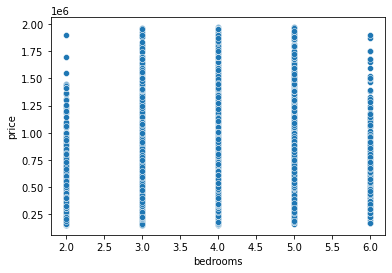

In [22]:
# After outlier dropping
sns.scatterplot(data=df_cleaned, x="bedrooms", y="price");

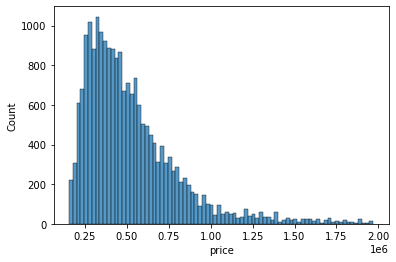

In [23]:
# After outlier dropping
sns.histplot(data=df_cleaned, x='price');

In general dropping 5% or less of your data as outliers is alright

Here we drop close to 4%

In [24]:
# Original shape
df.shape

(21597, 21)

In [25]:
# After outlier dropping
df_cleaned.shape

(20788, 16)

In [26]:
# How much data was dropped
21597-20788

809

In [27]:
# Percent of overall data
809/21597

0.03745890632958281

In [164]:
df_cleaned['grade'].unique()

array(['7 Average', '6 Low Average', '8 Good', '11 Excellent', '9 Better',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '13 Mansion'],
      dtype=object)

# Categorical Variables

Next we will need to convert our categorical variables to dummy variables

We will be working with waterfront, view, condition, and grade. The other features listed as object Dtype will require some different formatting

More info on dummy variables - [link](https://www.statology.org/dummy-variables-regression/)

In [28]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20788 entries, 0 to 21596
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20788 non-null  int64  
 1   date           20788 non-null  object 
 2   price          20788 non-null  float64
 3   bedrooms       20788 non-null  int64  
 4   bathrooms      20788 non-null  float64
 5   sqft_living    20788 non-null  int64  
 6   floors         20788 non-null  float64
 7   waterfront     18504 non-null  object 
 8   view           20727 non-null  object 
 9   condition      20788 non-null  object 
 10  grade          20788 non-null  object 
 11  sqft_basement  20788 non-null  object 
 12  yr_built       20788 non-null  int64  
 13  yr_renovated   17105 non-null  float64
 14  zipcode        20788 non-null  int64  
 15  sqft_living15  20788 non-null  int64  
dtypes: float64(4), int64(6), object(6)
memory usage: 2.7+ MB


### Waterfront

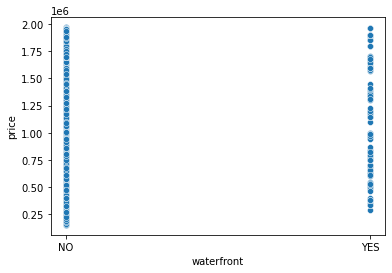

In [29]:
sns.scatterplot(data=df_cleaned, x='waterfront', y='price');

In [30]:
df_cleaned['waterfront'].value_counts()

NO     18407
YES       97
Name: waterfront, dtype: int64

In [31]:
df_cleaned.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
floors              0
waterfront       2284
view               61
condition           0
grade               0
sqft_basement       0
yr_built            0
yr_renovated     3683
zipcode             0
sqft_living15       0
dtype: int64

Here we can see we have a fair few Nans in our data. Using our domain knowledge a home seller who is actually at the waterfront is very likely to include this information when selling their home. Compared to someone who doesn't live on the waterfront might forget to fill in this information. 


Therefore all NaN values will be filled with 'NO'. Although some might have been an error in recording this seems like the best fit. Especially considering how few 'YES' answers there were originally

In [32]:
# Filling Nans with NO
df_cleaned['waterfront'].fillna('NO', inplace=True)

In [33]:
# Making sure it worked
df_cleaned.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
floors              0
waterfront          0
view               61
condition           0
grade               0
sqft_basement       0
yr_built            0
yr_renovated     3683
zipcode             0
sqft_living15       0
dtype: int64

This feature is now ready to be cast to a dummy variable which we will do once we clean up our other categorical features

### View

In [34]:
df_cleaned['view'].value_counts()

NONE         18787
AVERAGE        916
GOOD           474
FAIR           311
EXCELLENT      239
Name: view, dtype: int64

In [35]:
df_cleaned['view'].isna().value_counts()

False    20727
True        61
Name: view, dtype: int64

Based off the description of this variable:


" `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other"



I am taking None to mean no view of the things listed rather than no view at all

In [36]:
# filling Nans with in this case the mode
df_cleaned['view'].fillna(value='NONE', inplace=True)

### Grade

Grade doesn't need any cleaning. You could remove the number for slightly better formatting but I am leaving it as is

In [37]:
df_cleaned['grade'].value_counts()

7 Average        8767
8 Good           6003
9 Better         2578
6 Low Average    1834
10 Very Good     1061
11 Excellent      318
5 Fair            166
12 Luxury          52
4 Low               8
13 Mansion          1
Name: grade, dtype: int64

In [38]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20788 entries, 0 to 21596
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20788 non-null  int64  
 1   date           20788 non-null  object 
 2   price          20788 non-null  float64
 3   bedrooms       20788 non-null  int64  
 4   bathrooms      20788 non-null  float64
 5   sqft_living    20788 non-null  int64  
 6   floors         20788 non-null  float64
 7   waterfront     20788 non-null  object 
 8   view           20788 non-null  object 
 9   condition      20788 non-null  object 
 10  grade          20788 non-null  object 
 11  sqft_basement  20788 non-null  object 
 12  yr_built       20788 non-null  int64  
 13  yr_renovated   17105 non-null  float64
 14  zipcode        20788 non-null  int64  
 15  sqft_living15  20788 non-null  int64  
dtypes: float64(4), int64(6), object(6)
memory usage: 2.7+ MB


We now convert our wanted categorical features to dummy variables

In [39]:
df_cleaned['condition'].value_counts()

Average      13502
Good          5493
Very Good     1633
Fair           141
Poor            19
Name: condition, dtype: int64

In [40]:
# Casting categoricals to dummy variable
categoricals = ['view', 'waterfront', 'condition', 'grade']
dummies = pd.get_dummies(df_cleaned[categoricals], prefix=categoricals, drop_first=True)
dummies

,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE,waterfront_YES,condition_Fair,condition_Good,condition_Poor,condition_Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
21593,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
21594,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
21595,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [41]:
# Previewing our transformation
dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20788 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   view_EXCELLENT       20788 non-null  uint8
 1   view_FAIR            20788 non-null  uint8
 2   view_GOOD            20788 non-null  uint8
 3   view_NONE            20788 non-null  uint8
 4   waterfront_YES       20788 non-null  uint8
 5   condition_Fair       20788 non-null  uint8
 6   condition_Good       20788 non-null  uint8
 7   condition_Poor       20788 non-null  uint8
 8   condition_Very Good  20788 non-null  uint8
 9   grade_11 Excellent   20788 non-null  uint8
 10  grade_12 Luxury      20788 non-null  uint8
 11  grade_13 Mansion     20788 non-null  uint8
 12  grade_4 Low          20788 non-null  uint8
 13  grade_5 Fair         20788 non-null  uint8
 14  grade_6 Low Average  20788 non-null  uint8
 15  grade_7 Average      20788 non-null  uint8
 16  grade_8 Good         2

We continue with some other features that require cleaning or feature engineering

### yr_renovated

We will be changing yr_renovated to a binary was_renovated

In [42]:
# 0.0 meaning it was never renovated
df['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

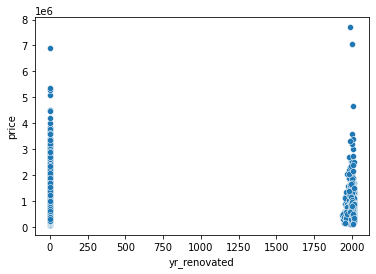

In [43]:
sns.scatterplot(data=df, x="yr_renovated", y="price");

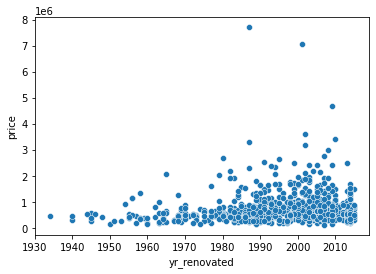

In [44]:
# There isn't a very strong linear relationship visually but we will try putting it in our model
sns.scatterplot(data=df[df['yr_renovated'] > 0], x="yr_renovated", y="price");

In [45]:
# Filling NaN values as zero (the mode)
df_cleaned['yr_renovated'].fillna(value=0, inplace=True) 

In [46]:
# Checking to see it worked
df_cleaned.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
sqft_living15    0
dtype: int64

In [47]:
# was_renovated is all values not 0
df_cleaned['was_renovated'] = df_cleaned['yr_renovated'] != 0 

In [48]:
df_cleaned['was_renovated'].value_counts()

False    20097
True       691
Name: was_renovated, dtype: int64

In [49]:
# Converting True False to 1 0 so we can feed it into our model
df_cleaned['was_renovated'].replace(True, 1, inplace=True)

In [50]:
df_cleaned['was_renovated'].value_counts()

0.0    20097
1.0      691
Name: was_renovated, dtype: int64

In [51]:
# Now we can drop yr_renovated since we won't be using it further
df_cleaned.drop('yr_renovated', axis=1, inplace=True)

### sqft_basement

We will be changing sqft_basement to a binary has_basement

In [52]:
df_cleaned['sqft_basement'].unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '700.0', '820.0', '780.0', '790.0', '330.0',
       '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0', '600.0',
       '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0', '880.0',
       '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0', '710.0',
       '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0', '620.0',
       '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0', '450.0',
       '1460.0', '1020.0', '1030.0', '750.0', '640.0', '1070.0', '490.0',
       '1310.0', '630.0', '2000.0', '390.0', '430.0', '850.0', '210.0',
       '1430.0', '1950.0', '440.0', '220.0', '1160.0', '860.0', '580.0',
       '2060.0', '1180.0', '200.0', '1150.0', '680.0', '530.0', '1450.0',
       '1170.0', '1080.0', '960.0', '870.0', '280.0', '1200.0', '1100.0',
       '460.0', '1400.0', '720.0', '660.0', '1220.0', '900.0', '420.0',
       '1580.0', '1380.0', '475.0', '690.0', '270.0', '3

In [53]:
df_cleaned['sqft_basement'].value_counts()

0.0       12336
?           432
600.0       211
500.0       205
700.0       202
          ...  
2500.0        1
2300.0        1
283.0         1
1920.0        1
768.0         1
Name: sqft_basement, Length: 290, dtype: int64

First we will need to deal with the placeholder "?"

In [54]:
# Replacing the placeholder with in this case the mode
df_cleaned['sqft_basement'] = df_cleaned['sqft_basement'].replace('?', '0')

In [55]:
# Making sqft_basement a float
df_cleaned['sqft_basement'] = df_cleaned['sqft_basement'].astype(float)

In [56]:
# Making sure it worked
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20788 entries, 0 to 21596
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20788 non-null  int64  
 1   date           20788 non-null  object 
 2   price          20788 non-null  float64
 3   bedrooms       20788 non-null  int64  
 4   bathrooms      20788 non-null  float64
 5   sqft_living    20788 non-null  int64  
 6   floors         20788 non-null  float64
 7   waterfront     20788 non-null  object 
 8   view           20788 non-null  object 
 9   condition      20788 non-null  object 
 10  grade          20788 non-null  object 
 11  sqft_basement  20788 non-null  float64
 12  yr_built       20788 non-null  int64  
 13  zipcode        20788 non-null  int64  
 14  sqft_living15  20788 non-null  int64  
 15  was_renovated  20788 non-null  float64
dtypes: float64(5), int64(6), object(5)
memory usage: 2.7+ MB


In [57]:
# Assigning has_basement to all variables greater than 0 (no basement)
df_cleaned['has_basement'] = df_cleaned['sqft_basement'] > 0

In [58]:
# Converting True False to 1 0
df_cleaned['has_basement'].replace(True, 1, inplace=True)

In [59]:
df_cleaned['has_basement'].value_counts()

0.0    12768
1.0     8020
Name: has_basement, dtype: int64

In [60]:
# Now we can drop sqft_basement since we won't be using it further
df_cleaned.drop('sqft_basement', axis=1, inplace=True)

Here we will group our cleaned features with our dummy variables from above

In [61]:
cleaned_dummies = pd.concat((dummies, df_cleaned), axis=1)
cleaned_dummies.head()

,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE,waterfront_YES,condition_Fair,condition_Good,condition_Poor,condition_Very Good,grade_11 Excellent,...,floors,waterfront,view,condition,grade,yr_built,zipcode,sqft_living15,was_renovated,has_basement
0,0,0,0,1,0,0,0,0,0,0,...,1.0,NO,NONE,Average,7 Average,1955,98178,1340,0.0,0.0
1,0,0,0,1,0,0,0,0,0,0,...,2.0,NO,NONE,Average,7 Average,1951,98125,1690,1.0,1.0
2,0,0,0,1,0,0,0,0,0,0,...,1.0,NO,NONE,Average,6 Low Average,1933,98028,2720,0.0,0.0
3,0,0,0,1,0,0,0,0,1,0,...,1.0,NO,NONE,Very Good,7 Average,1965,98136,1360,0.0,1.0
4,0,0,0,1,0,0,0,0,0,0,...,1.0,NO,NONE,Average,8 Good,1987,98074,1800,0.0,0.0


In [62]:
cleaned_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20788 entries, 0 to 21596
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   view_EXCELLENT       20788 non-null  uint8  
 1   view_FAIR            20788 non-null  uint8  
 2   view_GOOD            20788 non-null  uint8  
 3   view_NONE            20788 non-null  uint8  
 4   waterfront_YES       20788 non-null  uint8  
 5   condition_Fair       20788 non-null  uint8  
 6   condition_Good       20788 non-null  uint8  
 7   condition_Poor       20788 non-null  uint8  
 8   condition_Very Good  20788 non-null  uint8  
 9   grade_11 Excellent   20788 non-null  uint8  
 10  grade_12 Luxury      20788 non-null  uint8  
 11  grade_13 Mansion     20788 non-null  uint8  
 12  grade_4 Low          20788 non-null  uint8  
 13  grade_5 Fair         20788 non-null  uint8  
 14  grade_6 Low Average  20788 non-null  uint8  
 15  grade_7 Average      20788 non-null 

### Date

Next we will explore if what day of the week and what month the house was sold affects the price of the house sale

To do this we will first need to convert it to a datetime object to make it easier to work with

In [63]:
import datetime

In [64]:
# Making a copy to experiment with 
date_test = df_cleaned.copy()

In [65]:
# Checking value counts to see if anything stands out
date_test['date'].value_counts()

6/23/2014     138
6/26/2014     129
6/25/2014     125
4/27/2015     124
7/8/2014      121
             ... 
8/3/2014        1
5/17/2014       1
11/30/2014      1
11/2/2014       1
1/31/2015       1
Name: date, Length: 371, dtype: int64

In [66]:
# Converting date to datetime object
date_test['date'] = pd.to_datetime(date_test['date'], infer_datetime_format=True)

In [67]:
# Making sure it worked
date_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20788 entries, 0 to 21596
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             20788 non-null  int64         
 1   date           20788 non-null  datetime64[ns]
 2   price          20788 non-null  float64       
 3   bedrooms       20788 non-null  int64         
 4   bathrooms      20788 non-null  float64       
 5   sqft_living    20788 non-null  int64         
 6   floors         20788 non-null  float64       
 7   waterfront     20788 non-null  object        
 8   view           20788 non-null  object        
 9   condition      20788 non-null  object        
 10  grade          20788 non-null  object        
 11  yr_built       20788 non-null  int64         
 12  zipcode        20788 non-null  int64         
 13  sqft_living15  20788 non-null  int64         
 14  was_renovated  20788 non-null  float64       
 15  has_basement   2078

In [68]:
# Getting the day of the week the house was sold

# isoweekday(): Returns the day of the week as integer 
# where Monday is 1 and Sunday is 7

dates = date_test['date'] 
days = [] # Intitalize an empty list

# For each entry append the day of week to days
for x in dates:
    day = x.isoweekday()
    days.append(day) 

In [69]:
# Setting our list to a new column
date_test['day_of_week'] = days

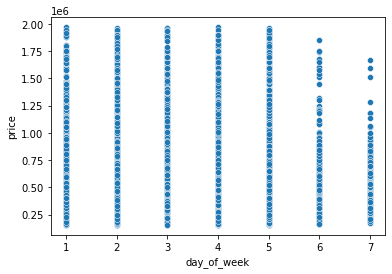

In [70]:
sns.scatterplot(data=date_test, x='day_of_week', y='price');

In [71]:
# Percentage of houses sold each day of the week
date_test['day_of_week'].value_counts()/len(date_test['day_of_week'])

2    0.217481
3    0.211661
1    0.190398
4    0.184914
5    0.171397
6    0.013325
7    0.010824
Name: day_of_week, dtype: float64

Here we can see almost none of our houses were sold on the weekend

In [72]:
date_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20788 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             20788 non-null  int64         
 1   date           20788 non-null  datetime64[ns]
 2   price          20788 non-null  float64       
 3   bedrooms       20788 non-null  int64         
 4   bathrooms      20788 non-null  float64       
 5   sqft_living    20788 non-null  int64         
 6   floors         20788 non-null  float64       
 7   waterfront     20788 non-null  object        
 8   view           20788 non-null  object        
 9   condition      20788 non-null  object        
 10  grade          20788 non-null  object        
 11  yr_built       20788 non-null  int64         
 12  zipcode        20788 non-null  int64         
 13  sqft_living15  20788 non-null  int64         
 14  was_renovated  20788 non-null  float64       
 15  has_basement   2078

We will sepearate out day_of_week into it's own dummy variable. To do this we will need to convert it to a string first


We will be putting this into a model to test later after we do the same process for the month the house was sold

In [73]:
# Convert day_of_week to string
date_test['day_of_week'] = date_test['day_of_week'].astype(str)

In [74]:
categoricals = ['day_of_week']
dummies_day = pd.get_dummies(date_test[categoricals], prefix=categoricals, drop_first=True)
dummies_day

,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7
0,0,0,0,0,0,0
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
21592,0,1,0,0,0,0
21593,0,0,0,0,0,0
21594,0,0,0,0,0,0
21595,0,0,0,1,0,0


In [75]:
# Concat price with the day_of_week dummy variables
day_test = pd.concat((dummies_day, date_test['price']), axis=1)

In [76]:
dates = date_test['date'] 
month_test = [] # Initialize an empty list

# For each entry append the month to the list
for x in dates:
    day = x.month
    month_test.append(day) 

In [77]:
date_test['month'] = month_test

In [78]:
# Convert month to string
date_test['month'] = date_test['month'].astype(str)

In [79]:
date_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20788 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             20788 non-null  int64         
 1   date           20788 non-null  datetime64[ns]
 2   price          20788 non-null  float64       
 3   bedrooms       20788 non-null  int64         
 4   bathrooms      20788 non-null  float64       
 5   sqft_living    20788 non-null  int64         
 6   floors         20788 non-null  float64       
 7   waterfront     20788 non-null  object        
 8   view           20788 non-null  object        
 9   condition      20788 non-null  object        
 10  grade          20788 non-null  object        
 11  yr_built       20788 non-null  int64         
 12  zipcode        20788 non-null  int64         
 13  sqft_living15  20788 non-null  int64         
 14  was_renovated  20788 non-null  float64       
 15  has_basement   2078

In [80]:
categoricals = ['month']
dummies_day = pd.get_dummies(date_test[categoricals], prefix=categoricals, drop_first=True)
dummies_day

,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9
0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
21592,0,0,0,0,0,0,1,0,0,0,0
21593,0,0,0,1,0,0,0,0,0,0,0
21594,0,0,0,0,0,0,0,1,0,0,0
21595,0,0,0,0,0,0,0,0,0,0,0


In [81]:
# Concat price with the month dummy variables
month_test = pd.concat((dummies_day, date_test['price']), axis=1)

We will use this to create a model shortly

# Modeling

### Baseline Model

First we will start with our highest correlated feature as a baseline model

In [82]:
df_cleaned.corr()

,id,price,bedrooms,bathrooms,sqft_living,floors,yr_built,zipcode,sqft_living15,was_renovated,has_basement
id,1.000000,-0.015874,0.000480,0.006800,-0.011513,0.019201,0.023060,-0.006943,0.000420,-0.009084,0.002172
price,-0.015874,1.000000,0.312855,0.498114,0.673611,0.270068,0.050189,-0.038533,0.596011,0.110487,0.164888
bedrooms,0.000480,0.312855,1.000000,0.501288,0.587500,0.163540,0.153764,-0.159991,0.402053,0.013423,0.141145
bathrooms,0.006800,0.498114,0.501288,1.000000,0.732729,0.501423,0.522894,-0.204042,0.551554,0.038588,0.136987
sqft_living,-0.011513,0.673611,0.587500,0.732729,1.000000,0.343898,0.329749,-0.201199,0.755196,0.037989,0.177241
floors,0.019201,0.270068,0.163540,0.501423,0.343898,1.000000,0.494344,-0.055347,0.268507,0.000338,-0.272345
yr_built,0.023060,0.050189,0.153764,0.522894,0.329749,0.494344,1.000000,-0.345049,0.331098,-0.203271,-0.176426
zipcode,-0.006943,-0.038533,-0.159991,-0.204042,-0.201199,-0.055347,-0.345049,1.000000,-0.280426,0.068282,0.167324
sqft_living15,0.000420,0.596011,0.402053,0.551554,0.755196,0.268507,0.331098,-0.280426,1.000000,-0.011879,0.019251
was_renovated,-0.009084,0.110487,0.013423,0.038588,0.037989,0.000338,-0.203271,0.068282,-0.011879,1.000000,0.042123


Sqft_living seems to have the strongest correlation so we will use that as our baseline

In [83]:
X = df_cleaned['sqft_living'] # Independent variable
y = df_cleaned['price'] # Dependent variable

X = sm.add_constant(X) # Adding a constant
model = sm.OLS(y,X) # Creating our model
results = model.fit() # Fitting our model
results.summary2() # Viewing the summary

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Ordinary least squares
======================================================================
Model:                OLS              Adj. R-squared:     0.454      
Dependent Variable:   price            AIC:                568467.3796
Date:                 2022-06-11 15:03 BIC:                568483.2639
No. Observations:     20788            Log-Likelihood:     -2.8423e+05
Df Model:             1                F-statistic:        1.727e+04  
Df Residuals:         20786            Prob (F-statistic): 0.00       
R-squared:            0.454            Scale:              4.4022e+10 
----------------------------------------------------------------------
              Coef.     Std.Err.    t     P>|t|    [0.025     0.975]  
----------------------------------------------------------------------
const       58586.7167 3824.6059  15.3184 0.0000 51090.1904 66083.2431
sqft_living   224.5700    1.7090 131.4014 0.0000   221.2202   227.9199
----------------------------------------------------------------------
Omnibus:              5004.135       Durbin-Watson:          1.981    
Prob(Omnibus):        0.000          Jarque-Bera (JB):       15804.231
Skew:                 1.228          Prob(JB):               0.000    
Kurtosis:             6.495          Condition No.:          5882     
======================================================================
* The condition number is large (6e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

### Model with Date

Here we will be looking if day of the week or month of the house sale has an affect on price

### Days of the Week

In [84]:
X = day_test.drop('price', axis=1) # All features except price
y = day_test['price'] # Dependent variable

X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Results: Ordinary least squares
============================================================================
Model:                  OLS                Adj. R-squared:       -0.000     
Dependent Variable:     price              AIC:                  581042.5678
Date:                   2022-06-11 15:03   BIC:                  581098.1627
No. Observations:       20788              Log-Likelihood:       -2.9051e+05
Df Model:               6                  F-statistic:          0.8248     
Df Residuals:           20781              Prob (F-statistic):   0.550      
R-squared:              0.000              Scale:                8.0591e+10 
----------------------------------------------------------------------------
                 Coef.     Std.Err.     t     P>|t|     [0.025      0.975]  
----------------------------------------------------------------------------
const         526677.9770  4512.3720 116.7187 0.0000 517833.3753 535522.5787
day_of_week_2  -3462.0668  6179.5942  -0.5602 0.5753 -15574.5544   8650.4208
day_of_week_3  -7238.7484  6219.1315  -1.1639 0.2445 -19428.7321   4951.2354
day_of_week_4  -5925.8123  6428.5966  -0.9218 0.3566 -18526.3641   6674.7395
day_of_week_5  -1815.2577  6555.9371  -0.2769 0.7819 -14665.4067  11034.8913
day_of_week_6  26752.5717 17643.7834   1.5163 0.1295  -7830.6225  61335.7659
day_of_week_7    245.5119 19456.1796   0.0126 0.9899 -37890.1206  38381.1444
----------------------------------------------------------------------------
Omnibus:                7218.929         Durbin-Watson:            1.975    
Prob(Omnibus):          0.000            Jarque-Bera (JB):         25370.807
Skew:                   1.756            Prob(JB):                 0.000    
Kurtosis:               7.117            Condition No.:            11       
============================================================================

"""

Our p-values are too high to be considered statistically significant. Meaning day of week does not seem to have an effect on house price. We will move on to test if there is an effect from month

### Month

In [85]:
X = month_test.drop('price', axis=1) # All features except price
y = month_test['price'] # Dependent variable

X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Ordinary least squares
======================================================================
Model:                OLS              Adj. R-squared:     0.002      
Dependent Variable:   price            AIC:                581010.8005
Date:                 2022-06-11 15:03 BIC:                581106.1060
No. Observations:     20788            Log-Likelihood:     -2.9049e+05
Df Model:             11               F-statistic:        4.249      
Df Residuals:         20776            Prob (F-statistic): 2.43e-06   
R-squared:            0.002            Scale:              8.0448e+10 
----------------------------------------------------------------------
            Coef.     Std.Err.     t    P>|t|     [0.025      0.975]  
----------------------------------------------------------------------
const    510966.8353  9305.7395 54.9088 0.0000 492726.8584 529206.8122
month_10  14082.4224 11445.2771  1.2304 0.2186  -8351.2155  36516.0603
month_11  -4983.3674 12078.1128 -0.4126 0.6799 -28657.4126  18690.6779
month_12  -3591.7602 11982.1362 -0.2998 0.7644 -27077.6838  19894.1633
month_2  -10327.9923 12429.2295 -0.8309 0.4060 -34690.2538  14034.2693
month_3   16424.2084 11475.6783  1.4312 0.1524  -6069.0181  38917.4349
month_4   35063.4153 11144.8230  3.1462 0.0017  13218.6909  56908.1397
month_5   18056.5647 11019.2079  1.6386 0.1013  -3541.9442  39655.0735
month_6   27344.2708 11167.1813  2.4486 0.0143   5455.7225  49232.8191
month_7   21038.3799 11135.4057  1.8893 0.0589   -787.8858  42864.6456
month_8    2039.4596 11372.9075  0.1793 0.8577 -20252.3281  24331.2473
month_9    1775.9199 11553.2744  0.1537 0.8778 -20869.4011  24421.2409
----------------------------------------------------------------------
Omnibus:              7238.177       Durbin-Watson:          1.974    
Prob(Omnibus):        0.000          Jarque-Bera (JB):       25576.430
Skew:                 1.759          Prob(JB):               0.000    
Kurtosis:             7.141          Condition No.:          17       
======================================================================

"""

Again our months have high p-values. The only ones that are less than our alpha 0.05 is month_4 and month_6. I will be excluding these features as I believe it will cause overfitting

### Continous features

Next we will be looking at all of our continuous features

In [86]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20788 entries, 0 to 21596
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20788 non-null  int64  
 1   date           20788 non-null  object 
 2   price          20788 non-null  float64
 3   bedrooms       20788 non-null  int64  
 4   bathrooms      20788 non-null  float64
 5   sqft_living    20788 non-null  int64  
 6   floors         20788 non-null  float64
 7   waterfront     20788 non-null  object 
 8   view           20788 non-null  object 
 9   condition      20788 non-null  object 
 10  grade          20788 non-null  object 
 11  yr_built       20788 non-null  int64  
 12  zipcode        20788 non-null  int64  
 13  sqft_living15  20788 non-null  int64  
 14  was_renovated  20788 non-null  float64
 15  has_basement   20788 non-null  float64
dtypes: float64(5), int64(6), object(5)
memory usage: 2.7+ MB


In [87]:
# Excluding object dtypes
cnt_ftrs = df_cleaned.select_dtypes(exclude=['object'])

# Dropping other categorical features
# Dropping id since it is a unique identifier
cnt_ftrs.drop(['was_renovated', 'has_basement', 'id', 'zipcode'], axis=1, inplace=True) 

X = cnt_ftrs.drop('price', axis=1)
y = cnt_ftrs['price']

X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
results.summary2()

C:\Users\aiden.local\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS                  Adj. R-squared:         0.550      
Dependent Variable:     price                AIC:                    564461.7416
Date:                   2022-06-11 15:03     BIC:                    564517.3365
No. Observations:       20788                Log-Likelihood:         -2.8222e+05
Df Model:               6                    F-statistic:            4228.      
Df Residuals:           20781                Prob (F-statistic):     0.00       
R-squared:              0.550                Scale:                  3.6298e+10 
--------------------------------------------------------------------------------
                 Coef.       Std.Err.     t     P>|t|     [0.025       0.975]   
--------------------------------------------------------------------------------
const         6199300.0216 109446.4934  56.6423 0.0000 5984776.3416 6413823.7016
bedrooms       -47346.8747   1979.3761 -23.9201 0.0000  -51226.6066  -43467.1428
bathrooms       62527.9224   3096.8701  20.1907 0.0000   56457.8150   68598.0298
sqft_living       170.7050      3.1146  54.8077 0.0000     164.6001     176.8099
floors          69152.4345   2989.5650  23.1313 0.0000   63292.6536   75012.2155
yr_built        -3203.8038     56.9905 -56.2165 0.0000   -3315.5096   -3092.0980
sqft_living15     106.5643      3.0633  34.7877 0.0000     100.5600     112.5685
--------------------------------------------------------------------------------
Omnibus:                  5053.088          Durbin-Watson:             1.981    
Prob(Omnibus):            0.000             Jarque-Bera (JB):          18680.373
Skew:                     1.185             Prob(JB):                  0.000    
Kurtosis:                 6.994             Condition No.:             296643   
================================================================================
* The condition number is large (3e+05). This might indicate             strong
multicollinearity or other numerical problems.
"""

I am using this as another type of baseline to see later how our categoricals affect our model

### Including Categoricals

In [88]:
# features
ftrs = cleaned_dummies.select_dtypes(exclude=['object'])

# Dropping id since it is a unique identifier
# Dropping zipcode since it is not a continous feature or a dummy variable
ftrs.drop(['id', 'zipcode'], axis=1, inplace=True)

X = ftrs.drop('price', axis=1)
y = ftrs['price']

X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
results.summary2()

C:\Users\aiden.local\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Ordinary least squares
======================================================================================
Model:                    OLS                    Adj. R-squared:           0.649      
Dependent Variable:       price                  AIC:                      559302.8151
Date:                     2022-06-11 15:03       BIC:                      559517.2527
No. Observations:         20788                  Log-Likelihood:           -2.7962e+05
Df Model:                 26                     F-statistic:              1479.      
Df Residuals:             20761                  Prob (F-statistic):       0.00       
R-squared:                0.649                  Scale:                    2.8294e+10 
--------------------------------------------------------------------------------------
                       Coef.       Std.Err.     t     P>|t|     [0.025       0.975]   
--------------------------------------------------------------------------------------
const               6404621.6294 113585.0075  56.3862 0.0000 6181986.1259 6627257.1329
view_EXCELLENT       131524.8037  13890.1001   9.4690 0.0000  104299.1206  158750.4868
view_FAIR             40762.6161  11057.5390   3.6864 0.0002   19088.9743   62436.2579
view_GOOD             49638.3395   9549.6359   5.1979 0.0000   30920.3058   68356.3732
view_NONE            -50783.8430   5837.7542  -8.6992 0.0000  -62226.2981  -39341.3880
waterfront_YES       241304.5503  20079.0621  12.0177 0.0000  201948.0173  280661.0833
condition_Fair       -43173.6890  14352.2183  -3.0082 0.0026  -71305.1599  -15042.2181
condition_Good        15922.2870   2931.8114   5.4309 0.0000   10175.7072   21668.8668
condition_Poor         4670.4070  38810.2766   0.1203 0.9042  -71400.7723   80741.5862
condition_Very Good   55788.3371   4733.7626  11.7852 0.0000   46509.7920   65066.8822
grade_11 Excellent   135778.5134  10931.9290  12.4204 0.0000  114351.0771  157205.9498
grade_12 Luxury      342477.6668  24267.5083  14.1126 0.0000  294911.4514  390043.8822
grade_13 Mansion     623478.4752 168454.0575   3.7012 0.0002  293295.3399  953661.6106
grade_4 Low         -516315.2014  60088.0491  -8.5926 0.0000 -634092.4800 -398537.9227
grade_5 Fair        -524695.1346  15363.1685 -34.1528 0.0000 -554808.1472 -494582.1221
grade_6 Low Average -476156.2779   8729.1848 -54.5476 0.0000 -493266.1634 -459046.3925
grade_7 Average     -395400.1489   7180.7189 -55.0641 0.0000 -409474.9200 -381325.3779
grade_8 Good        -300688.8585   6478.0086 -46.4169 0.0000 -313386.2623 -287991.4547
grade_9 Better      -151619.0463   6323.5396 -23.9769 0.0000 -164013.6787 -139224.4138
bedrooms             -17815.5707   1808.6211  -9.8504 0.0000  -21360.6096  -14270.5317
bathrooms             36004.3954   2862.8449  12.5764 0.0000   30392.9954   41615.7954
sqft_living              78.9538      3.0608  25.7950 0.0000      72.9544      84.9533
floors                52724.6345   2930.6281  17.9909 0.0000   46980.3741   58468.8950
yr_built              -2989.3556     58.1314 -51.4241 0.0000   -3103.2977   -2875.4136
sqft_living15            44.2257      2.9208  15.1414 0.0000      38.5006      49.9508
was_renovated         35797.8312   6901.6075   5.1869 0.0000   22270.1404   49325.5220
has_basement          37088.3941   2805.0914  13.2218 0.0000   31590.1954   42586.5928
--------------------------------------------------------------------------------------
Omnibus:                    4727.439            Durbin-Watson:               1.968    
Prob(Omnibus):              0.000               Jarque-Bera (JB):            20702.017
Skew:                       1.054               Prob(JB):                    0.000    
Kurtosis:                   7.411               Condition No.:               517106   
======================================================================================
* The condition number is large (5e+05). This might indicate    

We will remove all features with p-values > 0.05 and run it again

In [89]:
# features
ftrs = cleaned_dummies.select_dtypes(exclude=['object'])

# Remove features with high p-values
# Dropping id since it is a unique identifier
ftrs.drop(['condition_Poor', 'id', 'zipcode'],
          axis=1, inplace=True)


X = ftrs.drop('price', axis=1)
y = ftrs['price']

X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
results.summary2()

C:\Users\aiden.local\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Ordinary least squares
======================================================================================
Model:                    OLS                    Adj. R-squared:           0.649      
Dependent Variable:       price                  AIC:                      559300.8296
Date:                     2022-06-11 15:03       BIC:                      559507.3250
No. Observations:         20788                  Log-Likelihood:           -2.7962e+05
Df Model:                 25                     F-statistic:              1538.      
Df Residuals:             20762                  Prob (F-statistic):       0.00       
R-squared:                0.649                  Scale:                    2.8292e+10 
--------------------------------------------------------------------------------------
                       Coef.       Std.Err.     t     P>|t|     [0.025       0.975]   
--------------------------------------------------------------------------------------
const               6405131.8451 113503.1561  56.4313 0.0000 6182656.7774 6627606.9128
view_EXCELLENT       131532.2393  13889.6330   9.4698 0.0000  104307.4718  158757.0067
view_FAIR             40777.4418  11056.5903   3.6881 0.0002   19105.6597   62449.2239
view_GOOD             49638.7426   9549.4087   5.1981 0.0000   30921.1544   68356.3308
view_NONE            -50778.5330   5837.4489  -8.6988 0.0000  -62220.3896  -39336.6764
waterfront_YES       241345.6625  20075.6790  12.0218 0.0000  201995.7607  280695.5643
condition_Fair       -43198.0223  14350.4532  -3.0102 0.0026  -71326.0334  -15070.0111
condition_Good        15908.1436   2929.3852   5.4305 0.0000   10166.3193   21649.9679
condition_Very Good   55770.9528   4731.4455  11.7873 0.0000   46496.9494   65044.9562
grade_11 Excellent   135774.6408  10931.6222  12.4204 0.0000  114347.8059  157201.4757
grade_12 Luxury      342469.1970  24266.8303  14.1126 0.0000  294904.3108  390034.0833
grade_13 Mansion     623453.9914 168449.9365   3.7011 0.0002  293278.9344  953629.0485
grade_4 Low         -516318.8374  60086.6154  -8.5929 0.0000 -634093.3055 -398544.3693
grade_5 Fair        -524581.2258  15333.6168 -34.2112 0.0000 -554636.3147 -494526.1370
grade_6 Low Average -476132.7885   8726.7951 -54.5599 0.0000 -493237.9897 -459027.5872
grade_7 Average     -395391.5952   7180.1967 -55.0670 0.0000 -409465.3427 -381317.8478
grade_8 Good        -300681.3315   6477.5529 -46.4190 0.0000 -313377.8420 -287984.8210
grade_9 Better      -151616.0461   6323.3404 -23.9772 0.0000 -164010.2881 -139221.8042
bedrooms             -17815.6239   1808.5781  -9.8506 0.0000  -21360.5786  -14270.6692
bathrooms             36005.9426   2862.7481  12.5774 0.0000   30394.7324   41617.1529
sqft_living              78.9517      3.0607  25.7954 0.0000      72.9525      84.9508
floors                52722.6114   2930.5103  17.9909 0.0000   46978.5819   58466.6410
yr_built              -2989.6232     58.0875 -51.4676 0.0000   -3103.4792   -2875.7672
sqft_living15            44.2352      2.9197  15.1506 0.0000      38.5124      49.9581
was_renovated         35782.3928   6900.2513   5.1857 0.0000   22257.3604   49307.4253
has_basement          37084.6769   2804.8548  13.2216 0.0000   31586.9421   42582.4118
--------------------------------------------------------------------------------------
Omnibus:                    4728.297            Durbin-Watson:               1.968    
Prob(Omnibus):              0.000               Jarque-Bera (JB):            20710.064
Skew:                       1.054               Prob(JB):                    0.000    
Kurtosis:                   7.412               Condition No.:               517105   
======================================================================================
* The condition number is large (5e+05). This might indicate             strong
multicollinearity or other numerical problems.
"""

Including categoricals increases the adjusted R squared compared to only looking at the continuous features

### Zipcode

Here we will look at the affect of zipcode on our model

In [90]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20788 entries, 0 to 21596
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20788 non-null  int64  
 1   date           20788 non-null  object 
 2   price          20788 non-null  float64
 3   bedrooms       20788 non-null  int64  
 4   bathrooms      20788 non-null  float64
 5   sqft_living    20788 non-null  int64  
 6   floors         20788 non-null  float64
 7   waterfront     20788 non-null  object 
 8   view           20788 non-null  object 
 9   condition      20788 non-null  object 
 10  grade          20788 non-null  object 
 11  yr_built       20788 non-null  int64  
 12  zipcode        20788 non-null  int64  
 13  sqft_living15  20788 non-null  int64  
 14  was_renovated  20788 non-null  float64
 15  has_basement   20788 non-null  float64
dtypes: float64(5), int64(6), object(5)
memory usage: 2.7+ MB


In [91]:
# Making a copy to test
zip_test_df = df_cleaned.copy()
# Setting zipcode to string so we can cast to dummy
zip_test_df['zipcode'] = df_cleaned['zipcode'].astype(str)

In [92]:
# Casting to dummy
categoricals = ['zipcode']
dummies_zip = pd.get_dummies(zip_test_df[categoricals], prefix=categoricals, drop_first=True)
dummies_zip

,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21593,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
21594,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
# Concatting zip with price
test_dummies_zip = pd.concat((dummies_zip, df_cleaned['price']), axis=1)
test_dummies_zip.head()

,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,...,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,price
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,221900.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,538000.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,180000.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,604000.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,510000.0


In [94]:
# Modeling
ftrs = test_dummies_zip.select_dtypes(exclude=['object'])

X = ftrs.drop('price', axis=1)
y = ftrs['price']

X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
==============================================================================
Model:                  OLS                 Adj. R-squared:        0.456      
Dependent Variable:     price               AIC:                   568467.5116
Date:                   2022-06-11 15:03    BIC:                   569023.4607
No. Observations:       20788               Log-Likelihood:        -2.8416e+05
Df Model:               69                  F-statistic:           253.0      
Df Residuals:           20718               Prob (F-statistic):    0.00       
R-squared:              0.457               Scale:                 4.3879e+10 
------------------------------------------------------------------------------
                 Coef.      Std.Err.     t    P>|t|     [0.025       0.975]   
------------------------------------------------------------------------------
const          285871.6897 11228.9671 25.4584 0.0000  263862.0326  307881.3467
zipcode_98002  -44671.2951 19059.7654 -2.3437 0.0191  -82029.9314   -7312.6587
zipcode_98003   10231.8214 16953.1812  0.6035 0.5462  -22997.7445   43461.3872
zipcode_98004  863172.4892 16918.4169 51.0197 0.0000  830011.0641  896333.9143
zipcode_98005  524418.0068 19679.3170 26.6482 0.0000  485845.0008  562991.0128
zipcode_98006  521745.9503 14780.6293 35.2993 0.0000  492774.7568  550717.1439
zipcode_98007  327814.4648 21183.2718 15.4752 0.0000  286293.5894  369335.3402
zipcode_98008  306493.4843 16884.0864 18.1528 0.0000  273399.3497  339587.6188
zipcode_98010  137753.0423 24051.0449  5.7275 0.0000   90611.1064  184894.9782
zipcode_98011  205545.5953 18800.0840 10.9332 0.0000  168695.9550  242395.2356
zipcode_98014  190064.6675 22756.7226  8.3520 0.0000  145459.7049  234669.6300
zipcode_98019  144454.3322 19127.6460  7.5521 0.0000  106962.6445  181946.0199
zipcode_98022   33411.5428 17847.7564  1.8720 0.0612   -1571.4606   68394.5462
zipcode_98023    5576.4701 14735.1764  0.3784 0.7051  -23305.6322   34458.5724
zipcode_98024  302991.2217 26105.9921 11.6062 0.0000  251821.4280  354161.0155
zipcode_98027  314156.1863 15328.7682 20.4945 0.0000  284110.5974  344201.7751
zipcode_98028  175961.1118 16783.6159 10.4841 0.0000  143063.9072  208858.3163
zipcode_98029  321317.3981 16237.0597 19.7891 0.0000  289491.4867  353143.3096
zipcode_98030   12754.2984 17346.6798  0.7353 0.4622  -21246.5556   46755.1524
zipcode_98031   16137.9372 17024.0455  0.9479 0.3432  -17230.5282   49506.4026
zipcode_98032  -26600.0657 22385.8380 -1.1883 0.2347  -70478.0654   17277.9339
zipcode_98033  474560.9474 15217.3779 31.1855 0.0000  444733.6923  504388.2025
zipcode_98034  212606.6431 14425.9118 14.7378 0.0000  184330.7236  240882.5625
zipcode_98038   82136.6877 14189.9340  5.7884 0.0000   54323.3033  109950.0721
zipcode_98039 1187521.1675 41148.5672 28.8594 0.0000 1106866.7458 1268175.5892
zipcode_98040  777987.2524 17190.3324 45.2573 0.0000  744292.8516  811681.6533
zipcode_98042   29363.1592 14420.6072  2.0362 0.0417    1097.6371   57628.6814
zipcode_98045  155193.3288 18118.9976  8.5652 0.0000  119678.6712  190707.9864
zipcode_98052  357309.4261 14250.2907 25.0738 0.0000  329377.7378  385241.1145
zipcode_98053  382875.6882 15382.3502 24.8906 0.0000  352725.0744  413026.3020
zipcode_98055   22992.9489 17387.1061  1.3224 0.1860  -11087.1437   57073.0415
zipcode_98056  127492.9527 15382.3502  8.2883 0.0000   97342.3389  157643.5664
zipcode_98058   73625.7705 15034.7052  4.8971 0.0000   44156.5681  103094.9728
zipcode_98059  209412.2822 14868.3006 14.0845 0.0000  180269.2460  238555.3184
zipcode_98065  240146.2673 16473.7707 14.5775 0.0000  207856.3835  272436.1511
zipcode_98070  206374.2926 22680.4179  9.0992 0.0000  161918.8933  250829.6920
zipcode_98072  284991.5363 16988.3878 16.7757 0.0000  251692.9627  318290.1099
zipcode_98074  389323.3150 15096.2787 25.7894 0.0000  359733.4238  418913.2062
zipcode_98075  483511.148

Although there is a clear affect on price from zipcode I believe this will cause overfitting by adding too many features.

Next I will try pairing down zipcode to only looking at a few of the areas to reduce number of features. So I will create categories of Seattle and Bellevue two of the highest priced cities in King County 

In [95]:
# Seattle zips
st_zips = [98101, 98102, 98103, 98104, 98105, 98106, 98107, 98108, 98109, 
              98110, 98111, 98112, 98114, 98115, 98116, 98117, 98118, 98119, 
              98121, 98122, 98124, 98125, 98126, 98129, 98131, 98132, 98133,
              98134, 98136, 98138, 98144, 98145, 98146, 98148, 98151, 98154,
              98155, 98158, 98160, 98161, 98164, 98166, 98168, 98170, 98171,
              98174, 98177, 98178, 98181, 98184, 98185, 98188, 98190, 98191,
              98195, 98198, 98199]

In [96]:
# Bellevue zips
bell_zips = [98004, 98005, 98006, 98007, 98008, 98009, 98015]

In [97]:
# Returns 1 if zip is in Seattle
def in_seattle(zp):
    if zp in st_zips:
        return 1
    else:
        return 0

In [98]:
# Sets new column as zips in Seattle
df_cleaned['in_seattle'] = df_cleaned['zipcode'].apply(in_seattle)

In [99]:
# Returns 1 if zip is in Bellevue
def in_bellevue(zp):
    if zp in bell_zips:
        return 1
    else:
        return 0

In [100]:
# Sets new column as zips in Bellevue
df_cleaned['in_bellevue'] = df_cleaned['zipcode'].apply(in_bellevue)

In [101]:
# Dropping zipcode since we won't be using it further
df_cleaned.drop('zipcode', axis=1, inplace=True)

In [102]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20788 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20788 non-null  int64  
 1   date           20788 non-null  object 
 2   price          20788 non-null  float64
 3   bedrooms       20788 non-null  int64  
 4   bathrooms      20788 non-null  float64
 5   sqft_living    20788 non-null  int64  
 6   floors         20788 non-null  float64
 7   waterfront     20788 non-null  object 
 8   view           20788 non-null  object 
 9   condition      20788 non-null  object 
 10  grade          20788 non-null  object 
 11  yr_built       20788 non-null  int64  
 12  sqft_living15  20788 non-null  int64  
 13  was_renovated  20788 non-null  float64
 14  has_basement   20788 non-null  float64
 15  in_seattle     20788 non-null  int64  
 16  in_bellevue    20788 non-null  int64  
dtypes: float64(5), int64(7), object(5)
memory usage: 2

In [103]:
# features
ftrs = df_cleaned.select_dtypes(exclude=['object'])

# Remove features with high p-values
# Dropping id since it is a unique identifier
ftrs.drop(['id', 'has_basement'], 
          axis=1, inplace=True)

X = ftrs.drop('price', axis=1)
y = ftrs['price']

X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
results.summary2()

C:\Users\aiden.local\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS                  Adj. R-squared:         0.605      
Dependent Variable:     price                AIC:                    561723.2449
Date:                   2022-06-11 15:03     BIC:                    561802.6662
No. Observations:       20788                Log-Likelihood:         -2.8085e+05
Df Model:               9                    F-statistic:            3542.      
Df Residuals:           20778                Prob (F-statistic):     0.00       
R-squared:              0.605                Scale:                  3.1814e+10 
--------------------------------------------------------------------------------
                 Coef.       Std.Err.     t     P>|t|     [0.025       0.975]   
--------------------------------------------------------------------------------
const         3860391.8409 120966.9063  31.9128 0.0000 3623287.2494 4097496.4324
bedrooms       -44047.8676   1865.8422 -23.6075 0.0000  -47705.0642  -40390.6709
bathrooms       51675.9625   2927.6401  17.6511 0.0000   45937.5591   57414.3659
sqft_living       167.7835      2.9177  57.5057 0.0000     162.0646     173.5023
floors          55120.0500   2898.1546  19.0190 0.0000   49439.4404   60800.6596
yr_built        -2042.2730     62.1928 -32.8378 0.0000   -2164.1758   -1920.3701
sqft_living15     117.9680      2.9736  39.6713 0.0000     112.1394     123.7965
was_renovated   47628.5037   7186.8042   6.6272 0.0000   33541.8057   61715.2017
in_seattle     117965.4773   3138.1409  37.5909 0.0000  111814.4759  124116.4787
in_bellevue    235689.4085   5281.6781  44.6240 0.0000  225336.9067  246041.9104
--------------------------------------------------------------------------------
Omnibus:                  5154.124          Durbin-Watson:             1.986    
Prob(Omnibus):            0.000             Jarque-Bera (JB):          20237.417
Skew:                     1.189             Prob(JB):                  0.000    
Kurtosis:                 7.208             Condition No.:             350284   
================================================================================
* The condition number is large (4e+05). This might indicate             strong
multicollinearity or other numerical problems.
"""

I think it is better having added two new features instead of close to 70

In the next model I remove bedrooms since it doesn't make sense that it is negative. I will explore the bedrooms feature right after

In [104]:
# features
ftrs = df_cleaned.select_dtypes(exclude=['object'])

# Bedrooms because there is not a clear linear relationship 
# and I believe it is being overfit
ftrs.drop(['id', 'has_basement', 'bedrooms'], axis=1, inplace=True)

X = ftrs.drop('price', axis=1)
y = ftrs['price']

X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
results.summary2()

C:\Users\aiden.local\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS                  Adj. R-squared:         0.595      
Dependent Variable:     price                AIC:                    562271.4803
Date:                   2022-06-11 15:03     BIC:                    562342.9595
No. Observations:       20788                Log-Likelihood:         -2.8113e+05
Df Model:               8                    F-statistic:            3813.      
Df Residuals:           20779                Prob (F-statistic):     0.00       
R-squared:              0.595                Scale:                  3.2665e+10 
--------------------------------------------------------------------------------
                 Coef.       Std.Err.     t     P>|t|     [0.025       0.975]   
--------------------------------------------------------------------------------
const         3409653.3704 121039.0706  28.1699 0.0000 3172407.3318 3646899.4091
bathrooms       38708.5169   2913.8887  13.2841 0.0000   32997.0672   44419.9665
sqft_living       145.0929      2.7915  51.9775 0.0000     139.6214     150.5644
floors          58250.0764   2933.6196  19.8560 0.0000   52499.9527   64000.2002
yr_built        -1861.7110     62.5415 -29.7676 0.0000   -1984.2972   -1739.1247
sqft_living15     124.3599      3.0007  41.4442 0.0000     118.4784     130.2415
was_renovated   55667.9043   7274.1943   7.6528 0.0000   41409.9149   69925.8938
in_seattle     124989.9228   3165.5455  39.4845 0.0000  118785.2062  131194.6394
in_bellevue    231315.3677   5348.6199  43.2477 0.0000  220831.6547  241799.0807
--------------------------------------------------------------------------------
Omnibus:                  5164.301          Durbin-Watson:             1.986    
Prob(Omnibus):            0.000             Jarque-Bera (JB):          19909.751
Skew:                     1.198             Prob(JB):                  0.000    
Kurtosis:                 7.153             Condition No.:             345892   
================================================================================
* The condition number is large (3e+05). This might indicate             strong
multicollinearity or other numerical problems.
"""

### Bedrooms Testing

I am trying to investigate why bedrooms shows as negative

This doesn't make much sense as having more bedrooms should not decrease the price of the home

In [105]:
# Making a copy for testing
test_df = df_cleaned.copy()

In [106]:
# Setting bedroom # to string so we can cast to a dummy variable
test_df['bedrooms'] = test_df['bedrooms'].astype(str)

In [107]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20788 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20788 non-null  int64  
 1   date           20788 non-null  object 
 2   price          20788 non-null  float64
 3   bedrooms       20788 non-null  object 
 4   bathrooms      20788 non-null  float64
 5   sqft_living    20788 non-null  int64  
 6   floors         20788 non-null  float64
 7   waterfront     20788 non-null  object 
 8   view           20788 non-null  object 
 9   condition      20788 non-null  object 
 10  grade          20788 non-null  object 
 11  yr_built       20788 non-null  int64  
 12  sqft_living15  20788 non-null  int64  
 13  was_renovated  20788 non-null  float64
 14  has_basement   20788 non-null  float64
 15  in_seattle     20788 non-null  int64  
 16  in_bellevue    20788 non-null  int64  
dtypes: float64(5), int64(6), object(6)
memory usage: 2

In [108]:
# Making a dummy variable of bedrooms
categoricals = ['bedrooms']
dummer = pd.get_dummies(test_df[categoricals], prefix=categoricals, drop_first=True)
dummer

,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6
0,1,0,0,0
1,1,0,0,0
2,0,0,0,0
3,0,1,0,0
4,1,0,0,0
...,...,...,...,...
21592,1,0,0,0
21593,0,1,0,0
21594,0,0,0,0
21595,1,0,0,0


In [109]:
# Concatting bedrooms with price
test_dummies = pd.concat((dummer, test_df['price']), axis=1)
test_dummies.head()

,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,price
0,1,0,0,0,221900.0
1,1,0,0,0,538000.0
2,0,0,0,0,180000.0
3,0,1,0,0,604000.0
4,1,0,0,0,510000.0


In [110]:
# Modeling bedrooms by themselves
ftrs = test_dummies.select_dtypes(exclude=['object'])

X = ftrs.drop('price', axis=1)
y = ftrs['price']

X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Results: Ordinary least squares
========================================================================
Model:                OLS               Adj. R-squared:      0.105      
Dependent Variable:   price             AIC:                 578727.9385
Date:                 2022-06-11 15:03  BIC:                 578767.6491
No. Observations:     20788             Log-Likelihood:      -2.8936e+05
Df Model:             4                 F-statistic:         612.2      
Df Residuals:         20783             Prob (F-statistic):  0.00       
R-squared:            0.105             Scale:               7.2106e+10 
------------------------------------------------------------------------
              Coef.     Std.Err.     t    P>|t|     [0.025      0.975]  
------------------------------------------------------------------------
const      408956.6626  5222.2156 78.3109 0.0000 398720.7120 419192.6133
bedrooms_3  52880.0824  5896.2850  8.9684 0.0000  41322.9030  64437.2618
bedrooms_4 200243.7505  6161.1875 32.5008 0.0000 188167.3415 212320.1595
bedrooms_5 292494.7970  8634.4728 33.8752 0.0000 275570.5557 309419.0384
bedrooms_6 286702.8731 17703.2829 16.1949 0.0000 252003.0554 321402.6907
------------------------------------------------------------------------
Omnibus:              6705.887        Durbin-Watson:           1.973    
Prob(Omnibus):        0.000           Jarque-Bera (JB):        23196.209
Skew:                 1.625           Prob(JB):                0.000    
Kurtosis:             7.027           Condition No.:           11       
========================================================================

"""

In [111]:
# Concatting the dummies with our df
test_dummies = pd.concat((dummer, test_df), axis=1)
test_dummies.head()

,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,id,date,price,bedrooms,bathrooms,sqft_living,...,waterfront,view,condition,grade,yr_built,sqft_living15,was_renovated,has_basement,in_seattle,in_bellevue
0,1,0,0,0,7129300520,10/13/2014,221900.0,3,1.00,1180,...,NO,NONE,Average,7 Average,1955,1340,0.0,0.0,1,0
1,1,0,0,0,6414100192,12/9/2014,538000.0,3,2.25,2570,...,NO,NONE,Average,7 Average,1951,1690,1.0,1.0,1,0
2,0,0,0,0,5631500400,2/25/2015,180000.0,2,1.00,770,...,NO,NONE,Average,6 Low Average,1933,2720,0.0,0.0,0,0
3,0,1,0,0,2487200875,12/9/2014,604000.0,4,3.00,1960,...,NO,NONE,Very Good,7 Average,1965,1360,0.0,1.0,1,0
4,1,0,0,0,1954400510,2/18/2015,510000.0,3,2.00,1680,...,NO,NONE,Average,8 Good,1987,1800,0.0,0.0,0,0


In [112]:
# Modeling with other features to see how they interact
ftrs = test_dummies.select_dtypes(exclude=['object'])

ftrs.drop(['id'], axis=1, inplace=True)

X = ftrs.drop('price', axis=1)
y = ftrs['price']

X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
results.summary2()

C:\Users\aiden.local\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS                  Adj. R-squared:         0.605      
Dependent Variable:     price                AIC:                    561713.6373
Date:                   2022-06-11 15:03     BIC:                    561824.8271
No. Observations:       20788                Log-Likelihood:         -2.8084e+05
Df Model:               13                   F-statistic:            2455.      
Df Residuals:           20774                Prob (F-statistic):     0.00       
R-squared:              0.606                Scale:                  3.1793e+10 
--------------------------------------------------------------------------------
                 Coef.       Std.Err.     t     P>|t|     [0.025       0.975]   
--------------------------------------------------------------------------------
const         3772391.7452 120559.7695  31.2906 0.0000 3536085.1710 4008698.3194
bedrooms_3     -52435.7915   4151.1753 -12.6316 0.0000  -60572.4195  -44299.1634
bedrooms_4     -96427.3938   4814.1496 -20.0300 0.0000 -105863.5034  -86991.2842
bedrooms_5    -124705.7367   6659.5344 -18.7259 0.0000 -137758.9449 -111652.5286
bedrooms_6    -199310.3328  12477.5371 -15.9735 0.0000 -223767.2810 -174853.3847
bathrooms       51445.4610   3000.8738  17.1435 0.0000   45563.5136   57327.4083
sqft_living       166.8439      2.9690  56.1955 0.0000     161.0245     172.6634
floors          56752.7644   3169.4861  17.9060 0.0000   50540.3238   62965.2050
yr_built        -2039.4595     62.3042 -32.7339 0.0000   -2161.5805   -1917.3385
sqft_living15     118.1485      2.9956  39.4404 0.0000     112.2769     124.0202
was_renovated   47950.8453   7185.9016   6.6729 0.0000   33865.9163   62035.7742
has_basement     3205.2050   3036.8350   1.0554 0.2912   -2747.2290    9157.6391
in_seattle     115805.6649   3307.4178  35.0139 0.0000  109322.8674  122288.4625
in_bellevue    234848.8527   5290.5965  44.3899 0.0000  224478.8699  245218.8355
--------------------------------------------------------------------------------
Omnibus:                  5131.924          Durbin-Watson:             1.986    
Prob(Omnibus):            0.000             Jarque-Bera (JB):          20129.515
Skew:                     1.184             Prob(JB):                  0.000    
Kurtosis:                 7.199             Condition No.:             349243   
================================================================================
* The condition number is large (3e+05). This might indicate             strong
multicollinearity or other numerical problems.
"""

We still seem to be getting some sort of overfitting since obviously having more bedrooms should not decrease price

I don't know why it would be showing as negative but in the future I would like to investigate this further and investigate how zipcode and house price affects the bedroom feature. Since this is looking at all houses it doesn't give us the best idea. There will be a difference from a house in the middle of Seattle compared to one in a small town

This will be the final model we will be basing our recommendations on. The adjusted r squared is relatively low but we are using this as a descriptive model as the primary purpose. So we are mostly looking at the coefficients

In [113]:
# Concatting our dfs again since we added zip info
cleaned_dummies = pd.concat((dummies, df_cleaned), axis=1)

In [114]:
cleaned_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20788 entries, 0 to 21596
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   view_EXCELLENT       20788 non-null  uint8  
 1   view_FAIR            20788 non-null  uint8  
 2   view_GOOD            20788 non-null  uint8  
 3   view_NONE            20788 non-null  uint8  
 4   waterfront_YES       20788 non-null  uint8  
 5   condition_Fair       20788 non-null  uint8  
 6   condition_Good       20788 non-null  uint8  
 7   condition_Poor       20788 non-null  uint8  
 8   condition_Very Good  20788 non-null  uint8  
 9   grade_11 Excellent   20788 non-null  uint8  
 10  grade_12 Luxury      20788 non-null  uint8  
 11  grade_13 Mansion     20788 non-null  uint8  
 12  grade_4 Low          20788 non-null  uint8  
 13  grade_5 Fair         20788 non-null  uint8  
 14  grade_6 Low Average  20788 non-null  uint8  
 15  grade_7 Average      20788 non-null 

In [115]:
# Making final model
final = cleaned_dummies.copy() # Making a copy
final['price_log'] = np.log(final['price']) # Logging price

ftrs = final.select_dtypes(exclude=['object']) # Exluding object dtypes
# Dropping features we don't want to use/have high p-values
ftrs.drop(['id', 'price', 'view_GOOD', 
           'grade_13 Mansion', 'was_renovated', 'condition_Poor', 'bedrooms'], 
          axis=1, inplace=True)
# Setting X, y
X = ftrs.drop(['price_log'], axis = 1)
y = ftrs['price_log']

# Fitting and viewing final model
final_model = sm.OLS(y, sm.add_constant(X)).fit()
final_model.summary()

C:\Users\aiden.local\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     1768.
Date:                Sat, 11 Jun 2022   Prob (F-statistic):               0.00
Time:                        15:03:46   Log-Likelihood:                -3133.7
No. Observations:               20788   AIC:                             6315.
Df Residuals:                   20764   BIC:                             6506.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  20.7214      0.205    101.287      0.000      20.320      21.122
view_EXCELLENT          0.0738      0.022      3.283      0.001       0.030       0.118
view_FAIR               0.0466      0.018      2.635      0.008       0.012       0.081
view_NONE              -0.0644      0.008     -7.816      0.000      -0.080      -0.048
waterfront_YES          0.3403      0.034     10.145      0.000       0.275       0.406
condition_Fair         -0.1429      0.024     -5.949      0.000      -0.190      -0.096
condition_Good          0.0206      0.005      4.153      0.000       0.011       0.030
condition_Very Good     0.0871      0.008     11.064      0.000       0.072       0.103
grade_11 Excellent      0.0422      0.018      2.310      0.021       0.006       0.078
grade_12 Luxury         0.0069      0.041      0.171      0.865      -0.073       0.086
grade_4 Low            -0.7257      0.101     -7.208      0.000      -0.923      -0.528
grade_5 Fair           -0.8210      0.026    -31.779      0.000      -0.872      -0.770
grade_6 Low Average    -0.7416      0.015    -50.767      0.000      -0.770      -0.713
grade_7 Average        -0.5252      0.012    -44.027      0.000      -0.549      -0.502
grade_8 Good           -0.3293      0.011    -30.598      0.000      -0.350      -0.308
grade_9 Better         -0.1291      0.011    -12.250      0.000      -0.150      -0.108
bathrooms               0.0547      0.005     11.697      0.000       0.046       0.064
sqft_living             0.0001   4.77e-06     25.397      0.000       0.000       0.000
floors                  0.0913      0.005     17.833      0.000       0.081       0.101
yr_built               -0.0041      0.000    -39.736      0.000      -0.004      -0.004
sqft_living15           0.0001   5.05e-06     26.383      0.000       0.000       0.000
has_basement            0.0415      0.005      8.491      0.000       0.032       0.051
in_seattle              0.1752      0.005     32.706      0.000       0.165       0.186
in_bellevue             0.3257      0.008     38.590      0.000       0.309       0.342
==============================================================================
Omnibus:                       10.804   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.887
Skew:                          -0.003   Prob(JB):                      0.00262
Kurtosis:                       3.117   Cond. No.                     3.76e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.76e+05. This might indicate that there are
strong multicollinearity or other numerical problems.

# Interpreting the results

Since we have logged transformed our data it changes how we interpret our data

Here is a [link](https://data.library.virginia.edu/interpreting-log-transformations-in-a-linear-model/) to a more in depth explanation 

For our use case we only logged the dependent variable (price):

"Only the dependent/response variable is log-transformed. Exponentiate the coefficient, subtract one from this number, and multiply by 100. This gives the percent increase (or decrease) in the response for every one-unit increase in the independent variable. Example: the coefficient is 0.198. (exp(0.198) – 1) * 100 = 21.9. For every one-unit increase in the independent variable, our dependent variable increases by about 22%."

The coefficents:

For continous variables you can read them as when x increases by one unit, price increase by x %

So for every additional bathroom added the price increases by 5% ((exp(0.0539) – 1) * 100 = 5.5379

For non continous variables such as waterfront_YES we can interprett it as when there is a waterfront there is roughly a 34% increase to house price ((exp(0.0.2919) – 1) * 100 = 33.8969

# Assumptions

Next we will be making sure our model follows the assumptions for linear regression

More on [assumptions](https://www.statology.org/linear-regression-assumptions/)

### Linear Relationship

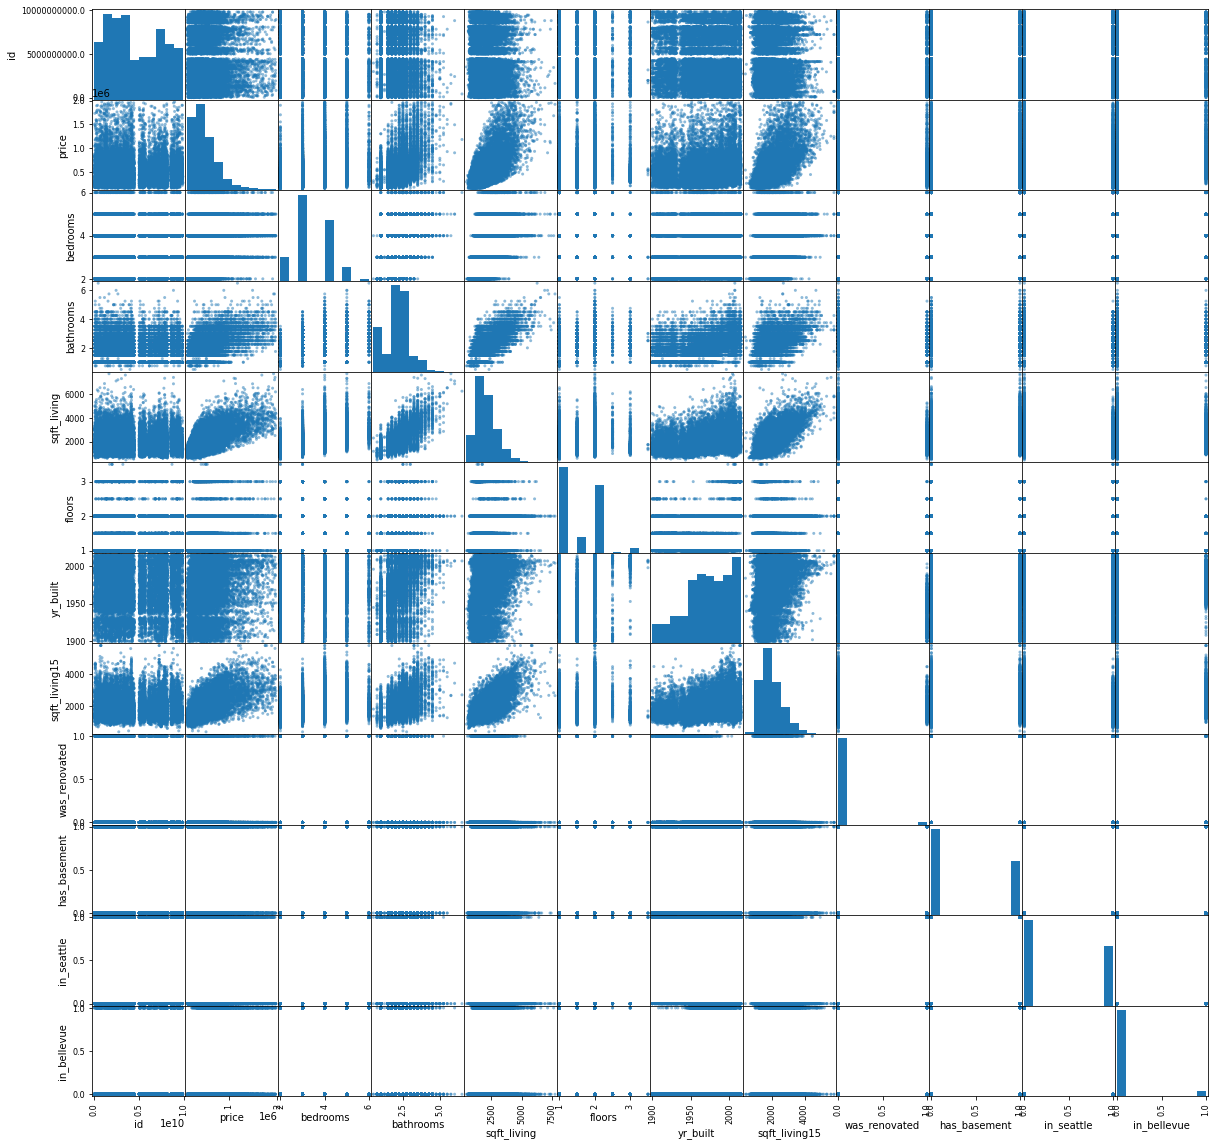

In [116]:
# Scatter matrix
pd.plotting.scatter_matrix(df_cleaned, figsize=[20, 20]);

There are a couple features that don't visually have a linear affect on price but when plugged into our model they have p-values below our alpha. So I am deciding to leave those features in

### Independence

To check for multicolinearity we will be using Variance Inflation Factor (VIF)

After using variance inflation factor (making sure you include an intercept) if the score of a feature is >=10 it should be removed.

More on [VIF](https://corporatefinanceinstitute.com/resources/knowledge/other/variance-inflation-factor-vif/)

In [117]:
# Setting the X, y
X = df_cleaned.drop('price', axis=1)
y = df_cleaned['price']

In [118]:
# find design matrix for linear regression model using 'price' as response variable 
ftr = 'price ~ bedrooms+bathrooms+sqft_living+floors+waterfront+view+condition+grade+yr_built+sqft_living15+was_renovated+in_seattle+in_bellevue'
y, X = dmatrices(ftr, data=df_cleaned, return_type='dataframe')

#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

#view VIF for each explanatory variable 
vif

,VIF,variable
0,12170.987073,Intercept
1,1.377182,waterfront[T.YES]
2,1.613547,view[T.EXCELLENT]
3,1.323821,view[T.FAIR]
4,1.493143,view[T.GOOD]
5,2.125213,view[T.NONE]
6,1.020220,condition[T.Fair]
7,1.277835,condition[T.Good]
8,1.010755,condition[T.Poor]
9,1.201846,condition[T.Very Good]


Here we can see we pass the check of independence

### Normality/Homoscedasticity

All non object features used in model. The price is logged

In [119]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20788 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20788 non-null  int64  
 1   date           20788 non-null  object 
 2   price          20788 non-null  float64
 3   bedrooms       20788 non-null  int64  
 4   bathrooms      20788 non-null  float64
 5   sqft_living    20788 non-null  int64  
 6   floors         20788 non-null  float64
 7   waterfront     20788 non-null  object 
 8   view           20788 non-null  object 
 9   condition      20788 non-null  object 
 10  grade          20788 non-null  object 
 11  yr_built       20788 non-null  int64  
 12  sqft_living15  20788 non-null  int64  
 13  was_renovated  20788 non-null  float64
 14  has_basement   20788 non-null  float64
 15  in_seattle     20788 non-null  int64  
 16  in_bellevue    20788 non-null  int64  
dtypes: float64(5), int64(7), object(5)
memory usage: 2

In [120]:
df_test = df_cleaned.copy() # Making a copy for testing
df_test['price_log'] = np.log(df_test['price']) # logging price

In [121]:
# Selecting features
features_2 = df_test.loc[:,['price_log', 'bathrooms', 
                            'sqft_living', 'floors', 'yr_built', 
                            'sqft_living15', 'was_renovated', 'has_basement']]
features_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20788 entries, 0 to 21596
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price_log      20788 non-null  float64
 1   bathrooms      20788 non-null  float64
 2   sqft_living    20788 non-null  int64  
 3   floors         20788 non-null  float64
 4   yr_built       20788 non-null  int64  
 5   sqft_living15  20788 non-null  int64  
 6   was_renovated  20788 non-null  float64
 7   has_basement   20788 non-null  float64
dtypes: float64(5), int64(3)
memory usage: 1.4 MB


In [122]:
# Setting X, y
X = features_2.drop(['price_log'], axis = 1)
y = features_2['price_log']

# Fitting and viewing model 
model_2 = sm.OLS(y, sm.add_constant(X)).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     3440.
Date:                Sat, 11 Jun 2022   Prob (F-statistic):               0.00
Time:                        15:04:29   Log-Likelihood:                -6408.0
No. Observations:               20788   AIC:                         1.283e+04
Df Residuals:                   20780   BIC:                         1.290e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            21.3723      0.198    107.942      0.000      20.984      21.760
bathrooms         0.0765      0.005     14.077      0.000       0.066       0.087
sqft_living       0.0002   5.17e-06     38.577      0.000       0.000       0.000
floors            0.1879      0.005     34.175      0.000       0.177       0.199
yr_built         -0.0049      0.000    -47.505      0.000      -0.005      -0.005
sqft_living15     0.0002   5.36e-06     41.348      0.000       0.000       0.000
was_renovated     0.0558      0.013      4.207      0.000       0.030       0.082
has_basement      0.1038      0.005     19.364      0.000       0.093       0.114
==============================================================================
Omnibus:                        5.376   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                5.288
Skew:                           0.026   Prob(JB):                       0.0711
Kurtosis:                       2.943   Cond. No.                     3.10e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [123]:
# Initialize the scaler
scaler = StandardScaler()

<AxesSubplot:ylabel='Count'>

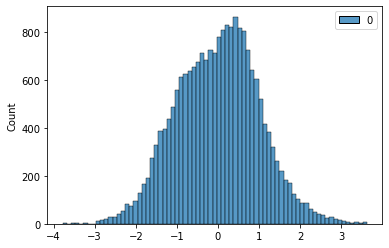

In [124]:
# Scale and visualize
scaled_resid_2 = scaler.fit_transform(model_2.resid.values.reshape(-1, 1))
sns.histplot(scaled_resid_2)

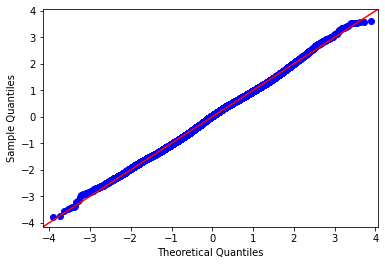

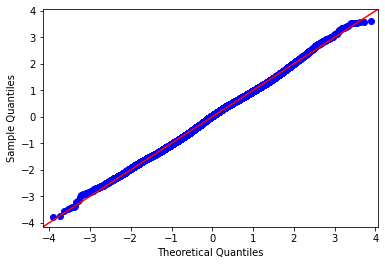

In [125]:
# qq plot checking residuals distribution
sm.qqplot(model_2.resid, dist = stats.norm, line = "45", fit = True)

Our qq plot shows that our residuals follow roughly a normal distribution but they are not perfect. The tails especially have some more variance indicating some outliers in our data

Below is our check for homoscedasticity

C:\Users\aiden.local\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


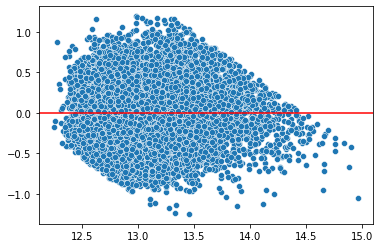

In [126]:
# Visual check for homoscedasticity
sns.scatterplot(model_2.predict(sm.add_constant(X)), model_2.resid)
plt.axhline(0, color = 'red')

This model doesn't seem to pass a strict homoscedasticity check. It has roughly a diamond shape to it.

### Normality/Homoscedasticity Check 2

Below we look at our normality and homoscedasticity again with our categorical (dummy) features

Price is again logged

In [127]:
# Making our model again
final = cleaned_dummies.copy()
final['price_log'] = np.log(final['price'])

ftrs = final.select_dtypes(exclude=['object'])
ftrs.drop(['id', 'price', 'view_GOOD', 
           'grade_13 Mansion', 'was_renovated', 'condition_Poor', 'bedrooms'], 
          axis=1, inplace=True)
X = ftrs.drop(['price_log'], axis = 1)
y = ftrs['price_log']

final_model = sm.OLS(y, sm.add_constant(X)).fit()
final_model.summary()

C:\Users\aiden.local\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     1768.
Date:                Sat, 11 Jun 2022   Prob (F-statistic):               0.00
Time:                        15:04:31   Log-Likelihood:                -3133.7
No. Observations:               20788   AIC:                             6315.
Df Residuals:                   20764   BIC:                             6506.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  20.7214      0.205    101.287      0.000      20.320      21.122
view_EXCELLENT          0.0738      0.022      3.283      0.001       0.030       0.118
view_FAIR               0.0466      0.018      2.635      0.008       0.012       0.081
view_NONE              -0.0644      0.008     -7.816      0.000      -0.080      -0.048
waterfront_YES          0.3403      0.034     10.145      0.000       0.275       0.406
condition_Fair         -0.1429      0.024     -5.949      0.000      -0.190      -0.096
condition_Good          0.0206      0.005      4.153      0.000       0.011       0.030
condition_Very Good     0.0871      0.008     11.064      0.000       0.072       0.103
grade_11 Excellent      0.0422      0.018      2.310      0.021       0.006       0.078
grade_12 Luxury         0.0069      0.041      0.171      0.865      -0.073       0.086
grade_4 Low            -0.7257      0.101     -7.208      0.000      -0.923      -0.528
grade_5 Fair           -0.8210      0.026    -31.779      0.000      -0.872      -0.770
grade_6 Low Average    -0.7416      0.015    -50.767      0.000      -0.770      -0.713
grade_7 Average        -0.5252      0.012    -44.027      0.000      -0.549      -0.502
grade_8 Good           -0.3293      0.011    -30.598      0.000      -0.350      -0.308
grade_9 Better         -0.1291      0.011    -12.250      0.000      -0.150      -0.108
bathrooms               0.0547      0.005     11.697      0.000       0.046       0.064
sqft_living             0.0001   4.77e-06     25.397      0.000       0.000       0.000
floors                  0.0913      0.005     17.833      0.000       0.081       0.101
yr_built               -0.0041      0.000    -39.736      0.000      -0.004      -0.004
sqft_living15           0.0001   5.05e-06     26.383      0.000       0.000       0.000
has_basement            0.0415      0.005      8.491      0.000       0.032       0.051
in_seattle              0.1752      0.005     32.706      0.000       0.165       0.186
in_bellevue             0.3257      0.008     38.590      0.000       0.309       0.342
==============================================================================
Omnibus:                       10.804   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.887
Skew:                          -0.003   Prob(JB):                      0.00262
Kurtosis:                       3.117   Cond. No.                     3.76e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.76e+05. This might indicate that there are
strong multicollinearity or other numerical problems.

In [128]:
# Initialize the scaler
scaler = StandardScaler()

<AxesSubplot:ylabel='Count'>

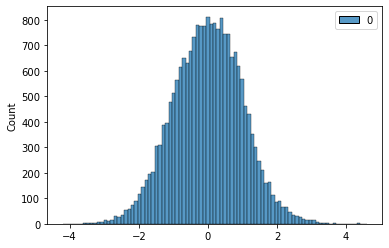

In [129]:
# Scale and visualize
scaled_resid_2 = scaler.fit_transform(final_model.resid.values.reshape(-1, 1))
sns.histplot(scaled_resid_2)

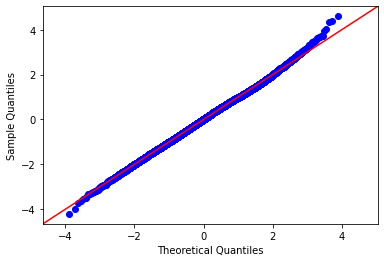

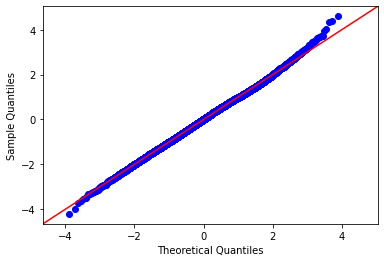

In [130]:
# qq plot checking residuals distribution
sm.qqplot(final_model.resid, dist = stats.norm, line = "45", fit = True)

Our qq plot is pretty similar to above where it roughly follows a normal distribution but they are not perfect. The tails especially have some more variance indicating some outliers in our data

Below is our check for homoscedasticity

C:\Users\aiden.local\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


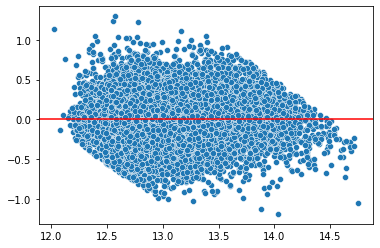

In [131]:
# Visual check for homoscedasticity
sns.scatterplot(final_model.predict(sm.add_constant(X)), final_model.resid)
plt.axhline(0, color = 'red')

This check is also similar to our above check the model doesn't seem to pass a strict homoscedasticity check. It also has roughly a diamond shape to it. In the future I would like to try to get this closer to passing

I attempted to fix this issue by logging some of the dependent variables but that did not seem to fix my issue and caused it to be challenging to interpret the results of the coefficients

# Conclusion
Since we do not strictly pass several of our assumption checks I would not be too confident in the accuracy of the models coefficients. 

Recommendations:
We can break our suggestions down to 2 main categories

Features to consider when buying
- waterfront
- View
- in_bellevue

Features that can be remodeled
- Condition
- Floors
- Bathrooms

When looking to buy homes for flipping we should look for homes ideally in Bellevue on the waterfront (on Lake Sammamish, Lake Washington, Phantom Lake). We can also just consider these aspects separately as a house on the waterfront but not in Bellevue will still have an increase in price. The view is also import to the house price. 

If we can find houses in those locations in need of some repairs they will be the easiest houses to flip. When remodeling we should focus on increasing the condition of the house "Condition: How good the overall condition of the house is. Related to maintenance of house." This will be overall maintenance of the house. For adding features we can look at adding additional bathrooms and additional floors as these two also play large roles in the price of the house

# Future project
For a future project I would like to make an integrated system to a house sale site that selects appropriate house candidates to purchase for flipping. An example would be a low valued house on the waterfront would be a quick buy since you could upgrade a few features and get big returns

Improvements to this current project:

I would also like to come back to this project and understand in greater depth some of the issues I ran into like the failed Homoscedasticity assumption and the effect of bedrooms on our house price